In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('1.xlsx')

Null values inside "TurnOver"            : 1
Null values inside "StatusKaryawan"      : 0


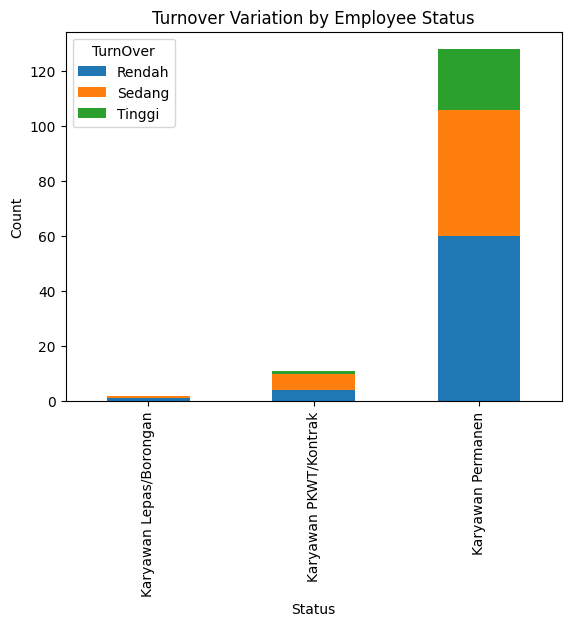

In [3]:
#Is there a correlation between 'JumlahKaryawan' (number of employees) and 'BidangUsaha' (business sector)? 
#Do certain business sectors tend to have larger or smaller employee counts?

print('Null values inside "TurnOver"            :', df['TurnOver'].isna().sum())
print('Null values inside "StatusKaryawan"      :', df['StatusKaryawan'].isna().sum())
df = df.dropna(subset=['TurnOver'])
status_columns = df['StatusKaryawan'].str.split(', ', expand=True)
status_columns.columns = ['Status' + str(i+1) for i in range(status_columns.shape[1])]
df = pd.concat([df, status_columns], axis=1)
turnover_by_status = df.groupby('Status1')['TurnOver'].value_counts().unstack().fillna(0)
turnover_by_status.plot(kind='bar', stacked=True)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Turnover Variation by Employee Status')
plt.show()